# Main Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

# Load CSV files
zillow_df = pd.read_csv('/Users/abhaychaudhary/Desktop/CA Data Raw/Zillow_df_filtered.csv')
# fair_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/fair_plan.csv')
nonrenewed_df = pd.read_csv('/Users/abhaychaudhary/Desktop/CA Data Raw/policy_renewals.csv')
white_pop_df = pd.read_csv('/Users/abhaychaudhary/Desktop/CA Data Raw/percent_white_population_flat.csv')
premiums_total_df = pd.read_csv('/Users/abhaychaudhary/Desktop/CA Data Raw/premiums_claims.csv')
# premiums_yearly_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/premiuns_yearly.csv')
yearly_median_inc_df = pd.read_csv('/Users/abhaychaudhary/Desktop/CA Data Raw/median_incomes_flat.csv')
# prcnt_lowest_inc_df = pd.read_csv('/Users/abhaychaudhary/Desktop/Climate Insurance Redlining Raw/yearly_lowest_income_by_zip.csv')


🔍 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   zipcode                                    1706 non-null   int64  
 1   policy_renewals_new_policies               1706 non-null   int64  
 2   policy_renewals_renewed_policies           1706 non-null   int64  
 3   policy_renewals_company_nonrenewed         1706 non-null   int64  
 4   policy_renewals_owner_nonrenewed           1706 non-null   int64  
 5   policy_renewals_nonrenewed_policies        1706 non-null   int64  
 6   policy_renewals_expiring_policies          1706 non-null   int64  
 7   policy_renewals_pct_nonrenewed_policies    1706 non-null   float64
 8   policy_renewals_pct_nonrenewed_owner       1706 non-null   float64
 9   policy_renewals_pct_nonrenewed_company     1706 non-null   float64
 10  policy_re

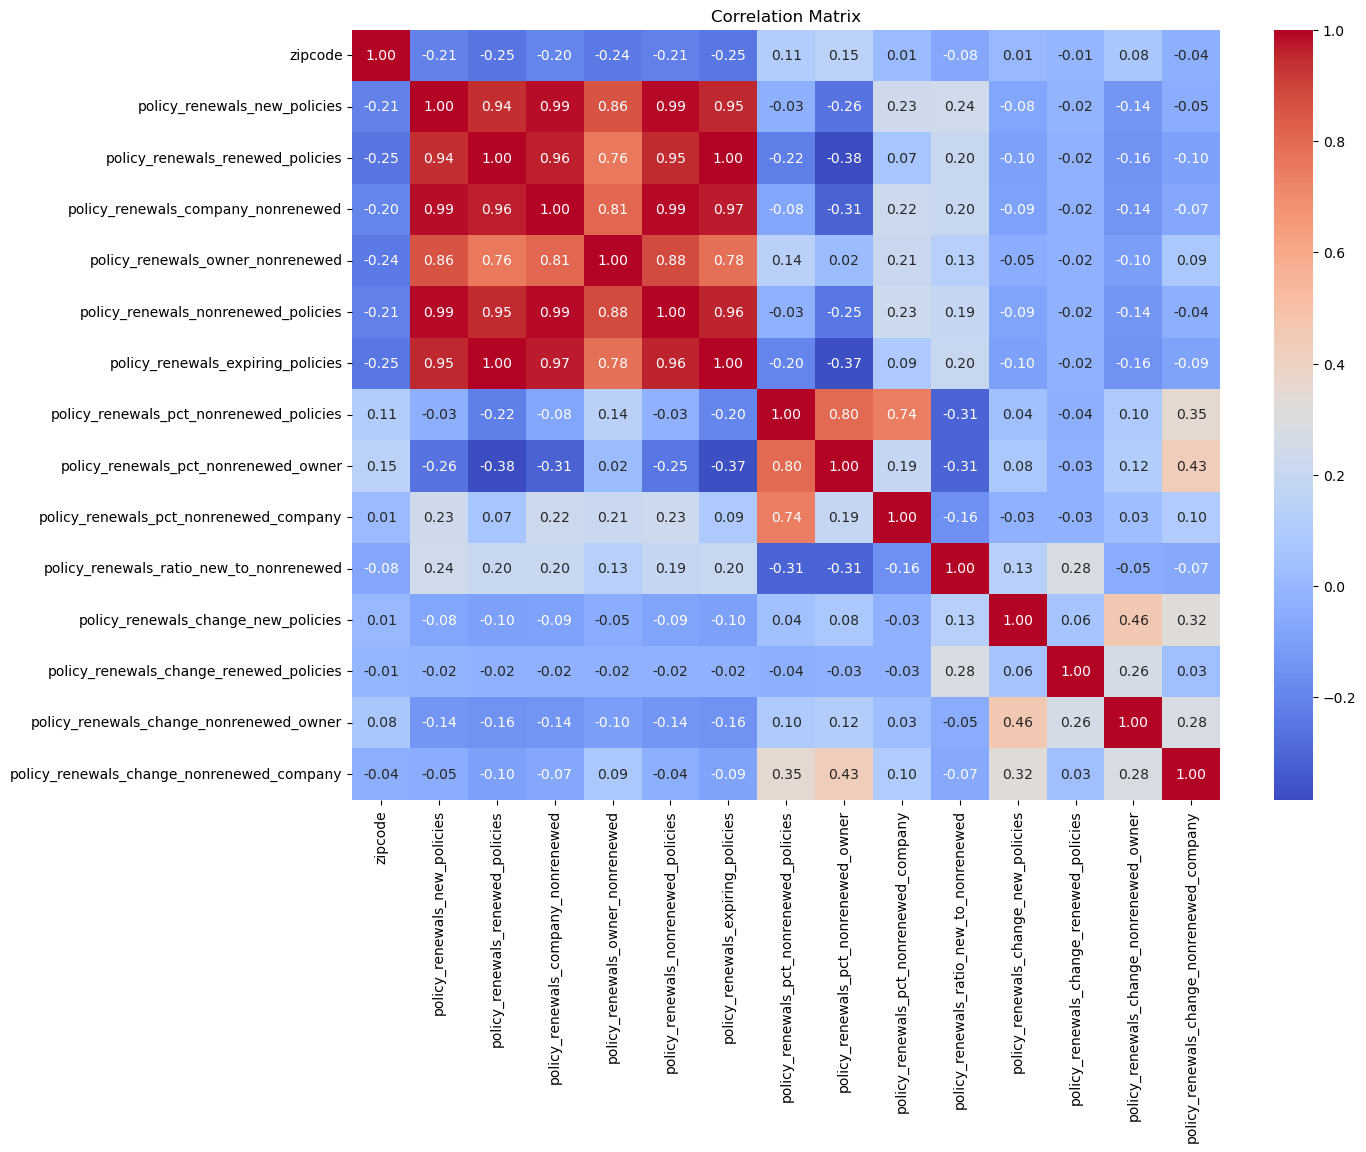

In [ ]:
# Load your dataset
df = pd.read_csv('/Users/abhaychaudhary/Desktop/cleaned_file.csv')

# Basic info
print("\n🔍 Basic Info:")
print(df.info())

# Descriptive statistics
print("\n📊 Descriptive Statistics:")
print(df.describe())

# Check for missing values
print("\n🕳️ Missing Values Per Column:")
print(df.isnull().sum())

# Check for duplicates
print(f"\n🔁 Duplicate Rows: {df.duplicated().sum()}")

# Correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()




In [17]:

# Load data
df = pd.read_csv('/Users/abhaychaudhary/Desktop/cleaned_file.csv')

# Feature engineering based on renewals
df['net_policy_change'] = df['policy_renewals_new_policies'] - df['policy_renewals_nonrenewed_policies']
df['nonrenewed_ratio'] = df['policy_renewals_nonrenewed_policies'] / df['policy_renewals_expiring_policies']
df['renewal_retention_rate'] = df['policy_renewals_renewed_policies'] / df['policy_renewals_expiring_policies']
df['owner_nonrenewed_pct'] = df['policy_renewals_owner_nonrenewed'] / df['policy_renewals_expiring_policies']
df['company_nonrenewed_pct'] = df['policy_renewals_company_nonrenewed'] / df['policy_renewals_expiring_policies']


In [18]:
# Create proxy target
df['at_risk_2022'] = (
    (df['nonrenewed_ratio'] > 0.4) |
    (df['company_nonrenewed_pct'] > 0.3) |
    (df['net_policy_change'] < 0)
).astype(int)

print("🔍 Target variable value counts:")
print(df['at_risk_2022'].value_counts())


🔍 Target variable value counts:
at_risk_2022
0    1154
1     552
Name: count, dtype: int64


In [21]:
print(df.columns.tolist())


['zipcode', 'policy_renewals_new_policies', 'policy_renewals_renewed_policies', 'policy_renewals_company_nonrenewed', 'policy_renewals_owner_nonrenewed', 'policy_renewals_nonrenewed_policies', 'policy_renewals_expiring_policies', 'policy_renewals_pct_nonrenewed_policies', 'policy_renewals_pct_nonrenewed_owner', 'policy_renewals_pct_nonrenewed_company', 'policy_renewals_ratio_new_to_nonrenewed', 'policy_renewals_change_new_policies', 'policy_renewals_change_renewed_policies', 'policy_renewals_change_nonrenewed_owner', 'policy_renewals_change_nonrenewed_company', 'net_policy_change', 'nonrenewed_ratio', 'renewal_retention_rate', 'owner_nonrenewed_pct', 'company_nonrenewed_pct', 'at_risk_2022']


In [23]:
# Check for infinite values
print("🔍 Any infinities:", np.isinf(X).values.any())

# Check for NaNs
print("❓ Any NaNs:", np.isnan(X).values.any())

# Show rows with inf or NaN
bad_rows = X[np.isinf(X).any(axis=1) | np.isnan(X).any(axis=1)]
print("⚠️ Rows with inf or NaN:")
print(bad_rows)


🔍 Any infinities: True
❓ Any NaNs: False
⚠️ Rows with inf or NaN:
      policy_renewals_new_policies  policy_renewals_renewed_policies  \
296                              1                                42   
447                             26                               101   
484                             12                                66   
614                            502                              2034   
691                             23                               163   
726                              0                                50   
728                              1                                21   
734                              9                               109   
761                             16                               178   
773                              7                                62   
789                             14                               121   
794                             13                               111  

In [24]:
# Drop rows with inf or NaN
X_clean = X.replace([np.inf, -np.inf], np.nan).dropna()
y_clean = y.loc[X_clean.index]

In [25]:
# Drop identifier and target for modeling
feature_cols = [
    'policy_renewals_new_policies',
    'policy_renewals_renewed_policies',
    'policy_renewals_expiring_policies',
    'policy_renewals_company_nonrenewed',
    'policy_renewals_owner_nonrenewed',
    'nonrenewed_ratio',
    'renewal_retention_rate',
    'company_nonrenewed_pct',
    'owner_nonrenewed_pct',
    'net_policy_change',
    'policy_renewals_pct_nonrenewed_policies',
    'policy_renewals_pct_nonrenewed_owner',
    'policy_renewals_pct_nonrenewed_company',
    'policy_renewals_ratio_new_to_nonrenewed',
    'policy_renewals_change_new_policies',
    'policy_renewals_change_renewed_policies',
    'policy_renewals_change_nonrenewed_owner',
    'policy_renewals_change_nonrenewed_company'
]

# Use cleaned X and y
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       105

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

[[228   0]
 [  0 105]]


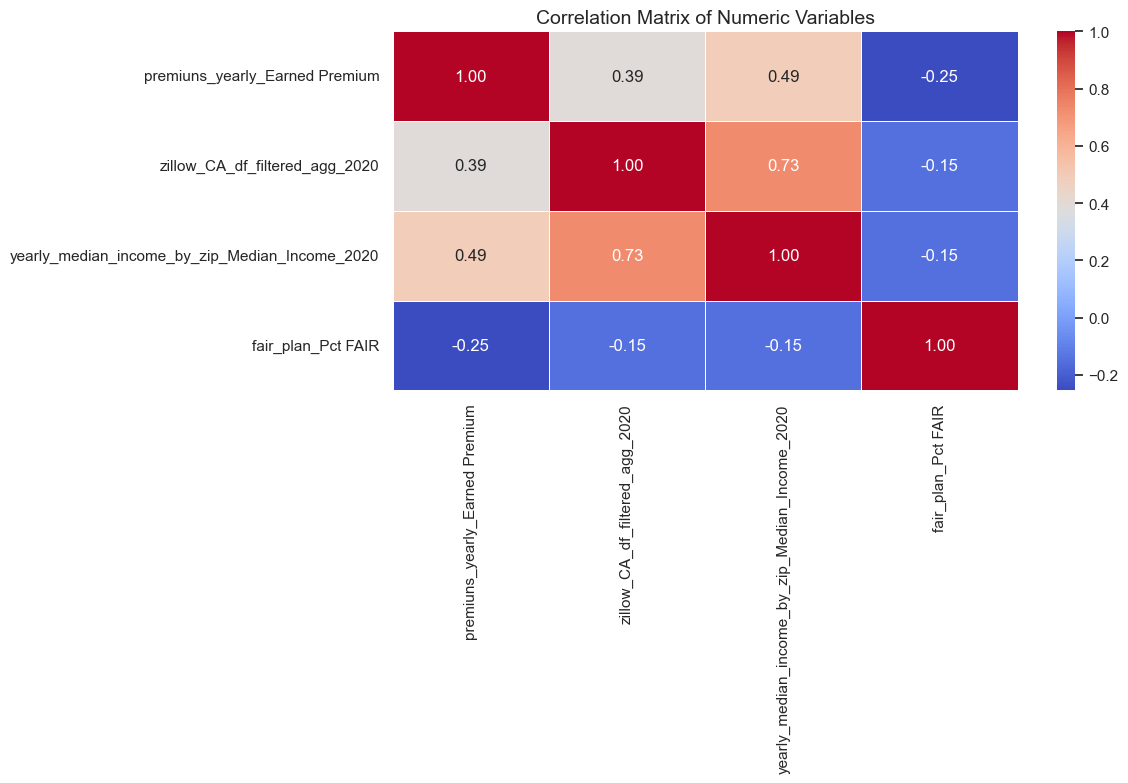

In [36]:
# List of numerical columns to calculate correlations
numeric_cols = [
    'premiuns_yearly_Earned Premium', 'zillow_CA_df_filtered_agg_2020', 
    'yearly_median_income_by_zip_Median_Income_2020', 'fair_plan_Pct FAIR'
    # Add any other numerical columns you're interested in
]

# Correlation matrix for numerical variables
corr_matrix = grouped_df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Variables', fontsize=14)
plt.tight_layout()
plt.show()


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42, stratify=y_clean
)


In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import classification_report, confusion_matrix

print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       105

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333

🔍 Confusion Matrix:
[[228   0]
 [  0 105]]


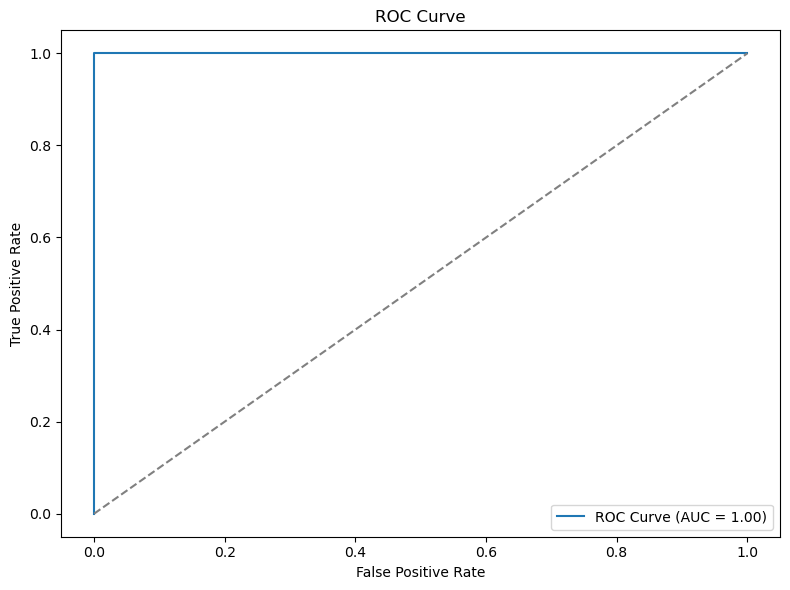

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_clean, y_clean, cv=5, scoring='accuracy')
print("🔁 5-Fold Cross-Validation Accuracy Scores:", cv_scores)
print("📌 Mean Accuracy:", cv_scores.mean())


🔁 5-Fold Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
📌 Mean Accuracy: 1.0


Valid premium columns: ['premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021']
Valid renewal columns: ['renewals_totals_Insured-Initiated Nonrenewed', 'renewals_totals_Insurer-Initiated Nonrenewed']
Valid demographics columns: ['percent_white_population_yearly_2018', 'percent_white_population_yearly_2019', 'percent_white_population_yearly_2020', 'percent_white_population_yearly_2021']


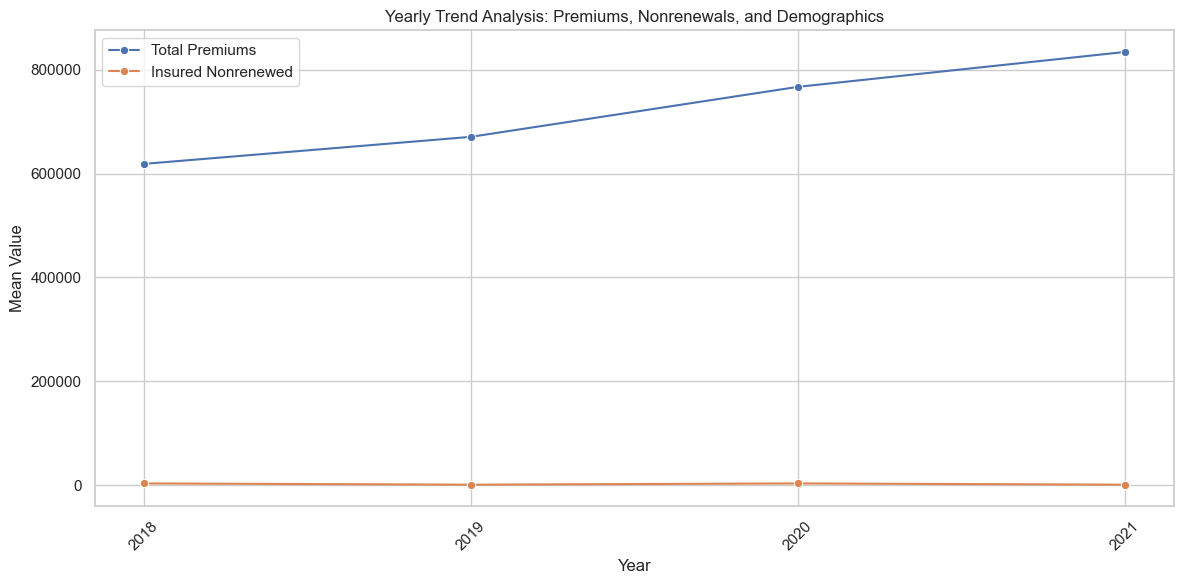

In [ ]:
# Define columns for premiums, renewals, and demographics for 2018-2021
premium_columns_yearly = [
    'premiuns_totals_2018', 'premiuns_totals_2019', 'premiuns_totals_2020', 'premiuns_totals_2021'
]

renewal_columns_yearly = [
    'renewals_totals_Insured-Initiated Nonrenewed', 
    'renewals_totals_Insurer-Initiated Nonrenewed'
]

# Filter the demographics columns to only include 2018-2021
demographics_columns_yearly = [
    'percent_white_population_yearly_2018', 
    'percent_white_population_yearly_2019', 
    'percent_white_population_yearly_2020', 
    'percent_white_population_yearly_2021'
]

# Create lists to store the valid columns after checking existence in the grouped dataframe
valid_premium_columns = []
valid_renewal_columns = []
valid_demographics_columns = []

# Validate columns
for col in premium_columns_yearly:
    if col in grouped_df.columns:
        valid_premium_columns.append(col)

for col in renewal_columns_yearly:
    if col in grouped_df.columns:
        valid_renewal_columns.append(col)

for col in demographics_columns_yearly:
    if col in grouped_df.columns:
        valid_demographics_columns.append(col)

# Print valid columns to confirm
print("Valid premium columns:", valid_premium_columns)
print("Valid renewal columns:", valid_renewal_columns)
print("Valid demographics columns:", valid_demographics_columns)

# Create a new DataFrame to store yearly trends for easier plotting
yearly_trends = pd.DataFrame({
    'Year': ['2018', '2019', '2020', '2021'],
    'Total Premiums': [
        grouped_df[valid_premium_columns[0]].mean() if len(valid_premium_columns) > 0 else None, 
        grouped_df[valid_premium_columns[1]].mean() if len(valid_premium_columns) > 1 else None,
        grouped_df[valid_premium_columns[2]].mean() if len(valid_premium_columns) > 2 else None,
        grouped_df[valid_premium_columns[3]].mean() if len(valid_premium_columns) > 3 else None
    ],
    'Insured Nonrenewed': [
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None,
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None
    ],
    'Insurer Nonrenewed': [
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None,
        grouped_df[valid_renewal_columns[0]].mean() if len(valid_renewal_columns) > 0 else None,
        grouped_df[valid_renewal_columns[1]].mean() if len(valid_renewal_columns) > 1 else None
    ],
    'White Population %': [
        grouped_df[valid_demographics_columns[0]].mean() if len(valid_demographics_columns) > 0 else None,
        grouped_df[valid_demographics_columns[1]].mean() if len(valid_demographics_columns) > 1 else None,
        grouped_df[valid_demographics_columns[2]].mean() if len(valid_demographics_columns) > 2 else None,
        grouped_df[valid_demographics_columns[3]].mean() if len(valid_demographics_columns) > 3 else None
    ]
})

# Plot the trends using Seaborn and Matplotlib
plt.figure(figsize=(12, 6))

# Plot each of the variables
sns.lineplot(x='Year', y='Total Premiums', data=yearly_trends, label='Total Premiums', marker='o')
sns.lineplot(x='Year', y='Insured Nonrenewed', data=yearly_trends, label='Insured Nonrenewed', marker='o')
sns.lineplot(x='Year', y='Insurer Nonrenewed', data=yearly_trends, label='Insurer Nonrenewed', marker='o')
sns.lineplot(x='Year', y='White Population %', data=yearly_trends, label='White Population %', marker='o')

# Customize the plot
plt.title('Yearly Trend Analysis: Premiums, Nonrenewals, and Demographics')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


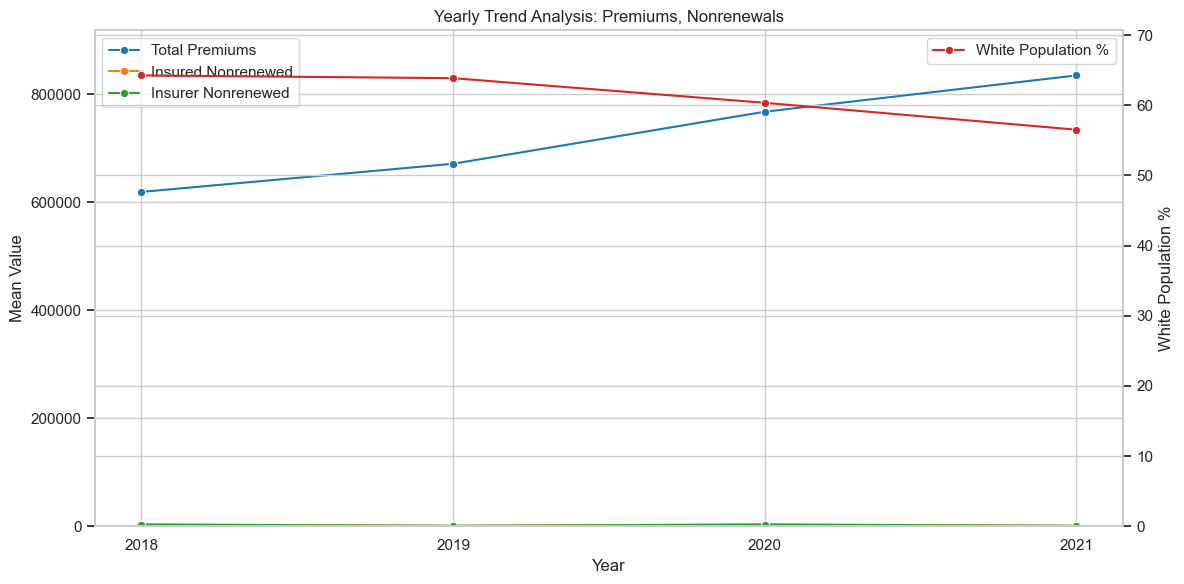

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the dataframe for yearly trends (from the previous code)
# Assuming yearly_trends is already calculated and contains columns: 'Year', 'Total Premiums', 'Insured Nonrenewed', 'Insurer Nonrenewed', 'White Population %'

plt.figure(figsize=(12, 6))

# Create a primary axis for Premiums, Insured Nonrenewed, and Insurer Nonrenewed
ax1 = plt.gca()

# Plot each of the variables on the primary axis (ax1)
sns.lineplot(x='Year', y='Total Premiums', data=yearly_trends, ax=ax1, label='Total Premiums', marker='o', color='tab:blue')
sns.lineplot(x='Year', y='Insured Nonrenewed', data=yearly_trends, ax=ax1, label='Insured Nonrenewed', marker='o', color='tab:orange')
sns.lineplot(x='Year', y='Insurer Nonrenewed', data=yearly_trends, ax=ax1, label='Insurer Nonrenewed', marker='o', color='tab:green')

# Customize primary axis (ax1) labels and title
ax1.set_title('Yearly Trend Analysis: Premiums, Nonrenewals')
ax1.set_xlabel('Year')
ax1.set_ylabel('Mean Value')

# Fix the max value calculation: Find the maximum for each relevant column
ax1.set_ylim(0, max(
    yearly_trends['Total Premiums'].max(),
    yearly_trends['Insured Nonrenewed'].max(),
    yearly_trends['Insurer Nonrenewed'].max()
) * 1.1)  # Scaling by 10% for better visibility

ax1.legend(loc='upper left')

# Create a secondary axis for White Population % (on the right side)
ax2 = ax1.twinx()

# Plot White Population % on the secondary axis (ax2)
sns.lineplot(x='Year', y='White Population %', data=yearly_trends, ax=ax2, label='White Population %', marker='o', color='tab:red')

# Customize secondary axis (ax2)
ax2.set_ylabel('White Population %')
ax2.set_ylim(0, yearly_trends['White Population %'].max() * 1.1)  # Scaling by 10% for better visibility
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
